In [ ]:
!pip install catboost

In [53]:
import matplotlib.pyplot as plt
import random

from matplotlib.colors import ListedColormap
from sklearn import datasets

from tqdm import tqdm
import numpy as np
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

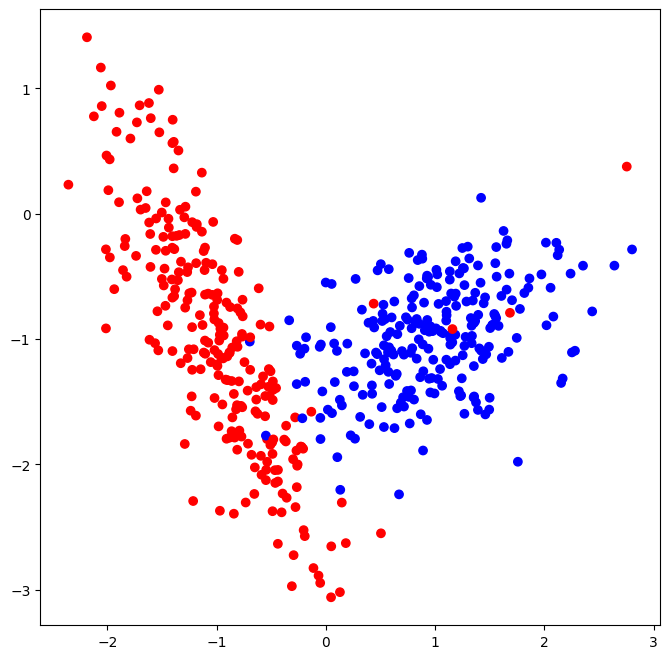

In [33]:
classification_data, classification_labels = datasets.make_classification(n_samples=500, n_features = 2, n_informative = 2,
                                                      n_classes = 2, n_redundant=0,
                                                      n_clusters_per_class=1, random_state=5)

colors = ListedColormap(['red', 'blue'])
light_colors = ListedColormap(['lightcoral', 'lightblue'])

plt.figure(figsize=(8,8))
plt.scatter(list(map(lambda x: x[0], classification_data)), list(map(lambda x: x[1], classification_data)),
              c=classification_labels, cmap=colors)
plt.show()


In [34]:
X_train, X_test, y_train, y_test = train_test_split(classification_data, classification_labels, test_size = 0.2, random_state=15)

In [35]:
best_lr = 0.0001
best_iter = 500
best_depth = 2
best_score = 0

for iter in tqdm(range(200, 1000, 100)):
    lr = 0.0001

    cur_lr = 0.0001
    cur_iter = iter
    cur_depth = 1
    cur_score = 0

    for x in range(5):
        for dep in range(5, 10):
            model = CatBoostClassifier(iterations=iter,
                          learning_rate=lr,
                          depth=dep, verbose=False)

            model.fit(X_train, y_train)

            predict = model.predict(X_test)

            if accuracy_score(predict, y_test) > cur_score:
                cur_lr = lr
                cur_depth = dep
                cur_score = accuracy_score(predict, y_test)

            if accuracy_score(predict, y_test) > best_score:
                best_lr = lr
                best_iter = iter
                best_depth = dep
                best_score = accuracy_score(predict, y_test)

        lr *= 10

    print("best_score:", cur_score, '\n', "best_iter:", cur_iter, '\n', "best_lr:", cur_lr, '\n', "best_depth:", cur_depth)

 12%|█▎        | 1/8 [00:10<01:15, 10.73s/it]

best_score: 0.98 
 best_iter: 200 
 best_lr: 0.01 
 best_depth: 5


 25%|██▌       | 2/8 [00:25<01:20, 13.38s/it]

best_score: 0.98 
 best_iter: 300 
 best_lr: 0.01 
 best_depth: 5


 38%|███▊      | 3/8 [00:46<01:24, 16.87s/it]

best_score: 0.98 
 best_iter: 400 
 best_lr: 0.001 
 best_depth: 8


 50%|█████     | 4/8 [01:12<01:20, 20.19s/it]

best_score: 0.98 
 best_iter: 500 
 best_lr: 0.001 
 best_depth: 7


 62%|██████▎   | 5/8 [01:41<01:10, 23.45s/it]

best_score: 0.98 
 best_iter: 600 
 best_lr: 0.001 
 best_depth: 7


 75%|███████▌  | 6/8 [02:16<00:55, 27.51s/it]

best_score: 0.98 
 best_iter: 700 
 best_lr: 0.001 
 best_depth: 6


 88%|████████▊ | 7/8 [02:56<00:31, 31.62s/it]

best_score: 0.98 
 best_iter: 800 
 best_lr: 0.001 
 best_depth: 6


100%|██████████| 8/8 [03:42<00:00, 27.76s/it]

best_score: 0.98 
 best_iter: 900 
 best_lr: 0.001 
 best_depth: 5


In [57]:
best_score = 0
best_cnt = 0
best_split = 0

for cnt in tqdm(range(100, 1001, 100)):
    print()

    cur_score = 0
    cur_split = 0

    for split in range(2, 11):
        model = RandomForestClassifier(n_estimators=cnt,
                                       min_samples_split=split,
                                       verbose=False,
                                       random_state=42)

        model.fit(X_train, y_train)
        predict = model.predict(X_test)

        score = accuracy_score(predict, y_test)

        if score > best_score:
            best_cnt = cnt
            best_split = split
            best_score = score

        if score > cur_score:
            cur_score = score
            cur_split = split

    print("\nscore: ", cur_score, "\nsplit: ", cur_split, "\ncnt: ", cnt)

  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:05<00:47,  5.26s/it]


score:  0.98 
split:  2 
cnt:  100



 20%|██        | 2/10 [00:08<00:34,  4.32s/it]


score:  0.98 
split:  2 
cnt:  200



 30%|███       | 3/10 [00:13<00:32,  4.61s/it]


score:  0.98 
split:  2 
cnt:  300



 40%|████      | 4/10 [00:23<00:39,  6.63s/it]


score:  0.98 
split:  2 
cnt:  400



 50%|█████     | 5/10 [00:31<00:35,  7.13s/it]


score:  0.98 
split:  2 
cnt:  500



 60%|██████    | 6/10 [00:42<00:34,  8.51s/it]


score:  0.98 
split:  2 
cnt:  600



 70%|███████   | 7/10 [00:55<00:29,  9.90s/it]


score:  0.98 
split:  2 
cnt:  700



 80%|████████  | 8/10 [01:09<00:22, 11.33s/it]


score:  0.98 
split:  2 
cnt:  800



 90%|█████████ | 9/10 [01:25<00:12, 12.71s/it]


score:  0.98 
split:  2 
cnt:  900



100%|██████████| 10/10 [01:44<00:00, 10.44s/it]


score:  0.98 
split:  2 
cnt:  1000


In [40]:
model = CatBoostClassifier(verbose=False)
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [55]:
f1_score(y_test, predict)

0.98

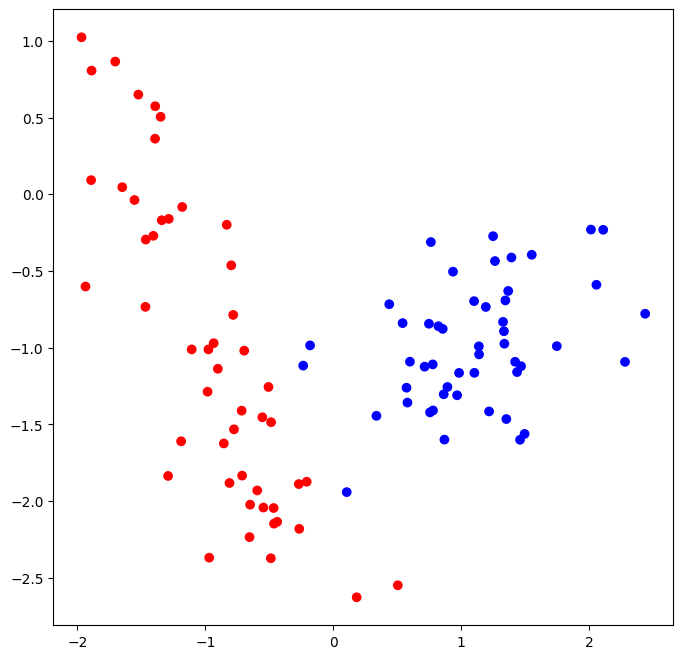

In [50]:
plt.figure(figsize=(8,8))
plt.scatter(list(map(lambda x: x[0], X_test)), list(map(lambda x: x[1], X_test)),
              c=predict, cmap=colors)
plt.show()

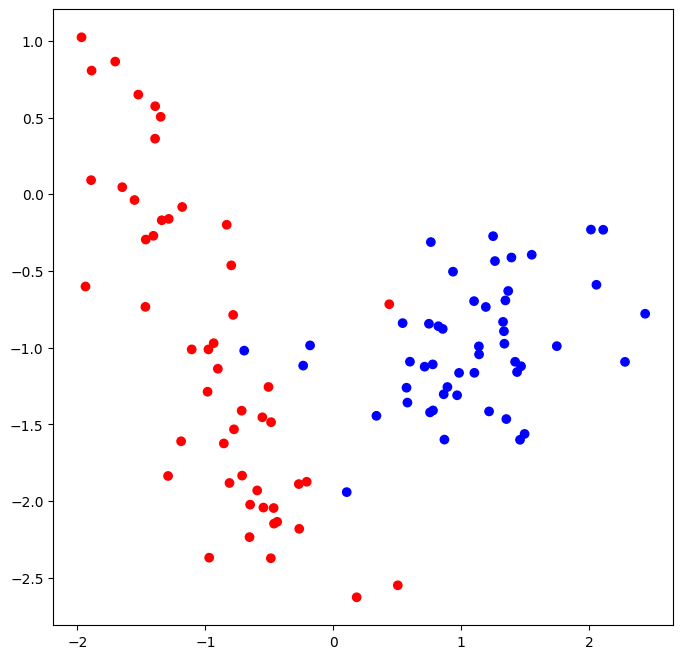

In [51]:
plt.figure(figsize=(8,8))
plt.scatter(list(map(lambda x: x[0], X_test)), list(map(lambda x: x[1], X_test)),
              c=y_test, cmap=colors)
plt.show()